<a href="https://colab.research.google.com/github/PacJ/Python/blob/master/p403_pandas_%EC%83%81%EA%B6%8C%EB%B6%84%EC%84%9D_%EC%BB%A4%ED%94%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 상권분석 서비스
[공공데이터포털_소상공인시장진흥공단_상가(상권)정보]  
https://www.data.go.kr/data/15083033/fileData.do

### colab 한글
- 메뉴에서 런타임->런타임 다시 시작

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

### 구글 드라이브 연동

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/DataAnalysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DataAnalysis


### import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filepath='./data/소상공인시장진흥공단_상가(상권)정보_20221231/소상공인시장진흥공단_상가(상권)정보_서울_202212.csv'
df = pd.read_csv(filepath, sep=',', encoding='utf-8')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [5]:
df.shape

(377724, 39)

In [6]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
set(df['상권업종대분류명'])

{'관광/여가/오락', '부동산', '생활서비스', '소매', '숙박', '스포츠', '음식', '학문/교육'}

In [8]:
print(set(df['상권업종대분류명']))

{'생활서비스', '음식', '스포츠', '관광/여가/오락', '학문/교육', '숙박', '소매', '부동산'}


In [11]:
print(set(df['상권업종중분류명']))

{'사진/광학/정밀기기소매', '음식배달서비스', '가정/주방/인테리어', '놀이/여가/취미', '가전제품소매', '학원-창업취업취미', '학문교육기타', '화장품소매', '음/식료품소매', '인력/고용/용역알선', '경마/경륜/성인오락', '학원기타', '철물/난방/건설자재소매', '평가/개발/관리', '의약/의료품소매', '연극/영화/극장', '한식', '양식', '스포츠/운동', '가구소매', '대중목욕탕/휴게', '사무/문구/컴퓨터', '기타판매업', '선물/팬시/기념품', '유아용품', '무도/유흥/가무', '일식/수산물', '중고품소매/교환', '학원-예능취미체육', '도서관/독서실', '광고/인쇄', '주유소/충전소', '가방/신발/액세서리', '법무세무회계', '분식', '분양', '커피점/카페', '실외운동시설', '운영관리시설', '책/서적/도서', '호텔/콘도', '닭/오리요리', '학원-자격/국가고시', '유스호스텔', '부페', '부동산관련서비스', '학원-음악미술무용', '패스트푸드', '운동/경기용품소매', '시계/귀금속소매', '학원-보습교습입시', '자동차/자동차용품', '요가/단전/마사지', '운송/배달/택배', '종교용품판매', '이/미용/건강', '개인/가정용품수리', '페인트/유리제품소매', '유아교육', '부동산중개', '중식', '기타서비스업', '행사/이벤트', '장례/묘지', '기타음식업', '예식/의례/관혼상제', '종합소매점', '대행업', '개인서비스', '건강/미용식품', '예술품/골동품/수석/분재', '실내운동시설', '세탁/가사서비스', '애견/애완/동물', '사진', '제과제빵떡케익', '주택수리', '캠프/별장/펜션', 'PC/오락/당구/볼링등', '자동차/이륜차', '물품기기대여', '학원-컴퓨터', '유흥주점', '모텔/여관/여인숙', '의복의류', '별식/퓨전요리', '취미/오락관련소매', '민박/하숙', '학원-어학'}


In [12]:
# 결측치
df.isnull().sum()

상가업소번호            0
상호명               0
지점명          314555
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      26181
표준산업분류명       26181
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         78602
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        327127
건물관리번호            0
건물명          190057
도로명주소             0
구우편번호             0
신우편번호            36
동정보          333667
층정보          146271
호정보          377724
경도                0
위도                0
dtype: int64

In [13]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [14]:
# 시도명에는 '서울특별시'만 존재한다.
df['시도명'].unique()

array(['서울특별시'], dtype=object)

In [15]:
# missingno 실행시 오류가 발생하면 설치한다.
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
# 결측시를 시각화해서 볼 수 있다.
import missingno as msno

In [17]:
#colab
plt.rc('font', family="nanumBarunGothic")

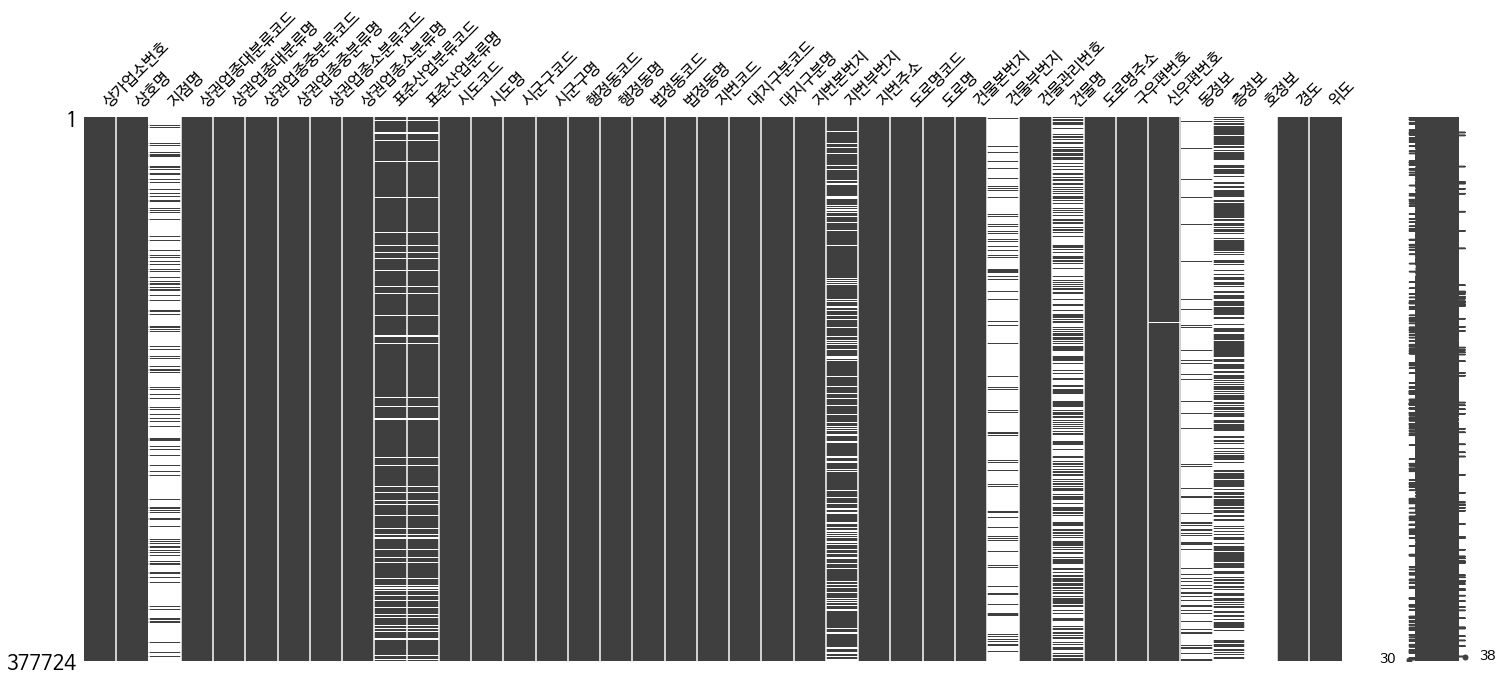

In [18]:
msno.matrix(df)

In [19]:
df['상권업종대분류명'].value_counts()

음식          125771
소매          107460
생활서비스        79679
학문/교육        27288
부동산          19784
관광/여가/오락      9820
스포츠           5420
숙박            2502
Name: 상권업종대분류명, dtype: int64

In [20]:
df['상권업종중분류명'].value_counts()

한식          41045
이/미용/건강     27870
종합소매점       24654
커피점/카페      21620
의복의류        16722
            ...  
캠프/별장/펜션       90
음식배달서비스        87
종교용품판매         49
유스호스텔          27
부동산관련서비스        2
Name: 상권업종중분류명, Length: 89, dtype: int64

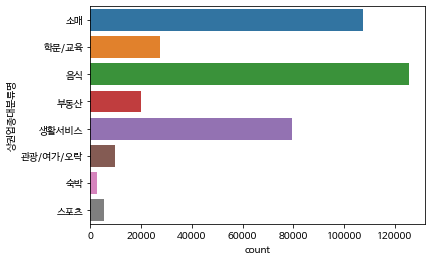

In [21]:
sns.countplot(data=df, y='상권업종대분류명')

In [22]:
df_food = df.loc[df['상권업종대분류명'].str.contains('음식')]
df_food.shape

(125771, 39)

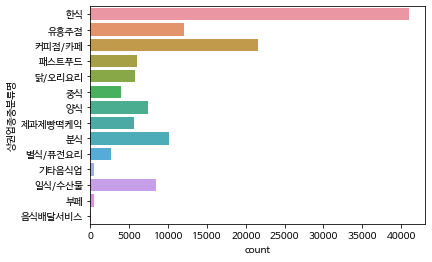

In [23]:
sns.countplot(data=df_food, y='상권업종중분류명')

### 스타벅스와 이디야

In [24]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [25]:
dataset = df[['상호명', '지점명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '도로명', '경도', '위도']]
dataset.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
0,제중건강원,NaN,건강/미용식품,서울특별시,영등포구,영등포동,서울특별시 영등포구 영중로14길,126.907168,37.520613
1,민속악기사,NaN,취미/오락관련소매,서울특별시,성동구,용답동,서울특별시 성동구 용답5길,127.049018,37.566857
2,태평양진주,NaN,시계/귀금속소매,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 서순라길,126.993530,37.571848
3,김선희꼼꼼국어교습소,NaN,학원-보습교습입시,서울특별시,송파구,방이1동,서울특별시 송파구 위례성대로12길,127.121520,37.510967
4,비지트,NaN,한식,서울특별시,서초구,방배4동,서울특별시 서초구 동광로18길,126.991394,37.488375


In [26]:
df_coffee = dataset[dataset['상권업종중분류명']=='커피점/카페']
df_coffee.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
20,커피빈,코리아대학로대명거리점,커피점/카페,서울특별시,종로구,혜화동,서울특별시 종로구 대명길,127.000171,37.583149
96,요거프레소,쌍문점,커피점/카페,서울특별시,도봉구,쌍문2동,서울특별시 도봉구 도당로,127.034746,37.658728
189,우성커피숍,NaN,커피점/카페,서울특별시,양천구,신월4동,서울특별시 양천구 오목로,126.842935,37.522055
196,버블베어,NaN,커피점/카페,서울특별시,강서구,방화3동,서울특별시 강서구 금낭화로,126.813358,37.580941
232,알뤼르,NaN,커피점/카페,서울특별시,강남구,대치4동,서울특별시 강남구 삼성로85길,127.054731,37.504378


In [27]:
df_coffee.columns

Index(['상호명', '지점명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '도로명', '경도', '위도'], dtype='object')

In [29]:
print(df_coffee['상호명'].unique().shape)
df_coffee['상호명'].unique()

(15151,)


array(['커피빈', '요거프레소', '우성커피숍', ..., '힐리HILLI', '덩키카페', '감화커피'],
      dtype=object)

In [30]:
df_coffee['상호명'].value_counts()

카페         762
이디야커피      401
스타벅스       324
메가엠지씨커피    242
컴포즈커피      226
          ... 
카페21         1
도반커피         1
캠퍼스컵밥        1
루앙의부엉이       1
감화커피         1
Name: 상호명, Length: 15151, dtype: int64

In [31]:
print(set(df_coffee['상호명'].unique()))

{'카페모에드(CAFEMOED)', '질시루', '카페라빈', '비티앤마', '팔공티롯데슈퍼', '오에이오서울', '풍간찻집', '투사이드카페', '사과나무', '커피총각', '르트레라네', '옥수서재', '웜블루', 'SAYSOMETHING', '밥스카페', '삼손이네커피', '라피아토', '윈디', '스칼라티움', '베르디', '로우민트', '네이비무드', '파이오니어커피', '카페늘봄', '아로믹스커피시스템', '놀숲압구정역점', '보드게임한판', '체크인', '305로스터리까페', '요거트풀', '가온누리', '요거프레소길음뉴타운점', '숨숨', '멜로워', '에스씨피스쿱', '마빈박', '남산스퀘어약국', '카페연무장', '루트커피', '더솜', '수정커피호프', '히스토리카페', '코오롱엘에스아이', '디에쉐르', '어피스앤드피스', '매머드커피', '그냥,지금', '베스킨라빈스', '헤즈업', '엔제리너스둔촌D/i', '어쨌거나1MM', '해빛', '커피와대장장이', '바우리', '브라운시티', '더플롯', '누나', '카페수기', '아그데아그데티하우스', '뮤지드아트', '쌍계명차티하우스', '누드브라운샵', '쿠쿠스무스카페24', '띠아모쌍문동점', '고려대학교교육관로즈버드커피전문점', '후르츠13.5', '메구스아로마', '커피숲', '투썸플레이스명동역점', '발도스커피위더스', '그린파파야향기', '폴바셋신세계백화점본점', '카베하네', '키미', '네이처셀도봉산캠프', '립스트커피', '샛별', '라온', 'cafe시4랑', '카페봄날', '카페테리아스테이션', '더드림', '카페131', '궁', 'cafethirstea', '세라젬웰카페', '서계동커피집', '올어바웃커피랩', '아맘.픽', '알렉스더커피', '레이노', '행복당', '널독', '엠북카페', '극락왕생', '프로방스커피', '카페베네금호점', '카페달토끼', '커피&와플', '더피움', '브루다인사동', '카페베네', 'Eliot', 'OwinSmartCarCafe',

In [33]:
df_coffee.loc[df_coffee['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명'].shape

(464,)

In [34]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA'),'상호명'].shape

(446,)

In [35]:
df_coffee.loc[df_coffee['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명'].unique()

array(['스타벅스', '스타벅스남부터미널2점', '스타벅스미아사거리역점', '스타벅스중랑구청점', '스타벅스구로디지털로점',
       '스타벅스구로에이스트윈타워1점', '스타벅스종로관수점', '스타벅스논현힐탑', '스타벅스을지로입구',
       '스타벅스교대역점', '스타벅스소공로북창점', '스타벅스고대프라자점', '스타벅스황학캐슬점', '스타벅스신세계본점',
       '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스여의도점', '스타벅스광화문점', '스타벅스구산역점',
       '스타벅스신촌점', '스타벅스숭실대점', '스타벅스상암DMC센트럴몰점', '스타벅스역삼역점', '스타벅스삼청동점',
       '스타벅스홍대삼거리점', '스타벅스광장점', '스타벅스신촌명물거리점', '스타벅스합정메세나몰점', '스타벅스경복궁역',
       '스타벅스대치점', '스타벅스광운대점', '스타벅스올림픽공원남문점', '스타벅스코엑스사거리점', '스타벅스신압구정점',
       '스타벅스명동중앙로', '스타벅스가락시장역점', '스타벅스외대점', '스타벅스광화문역점', '스타벅스명동역점',
       '스타벅스연세백양로점', '스타벅스W-MALL점', '스타벅스월드컵경기장점', '스타벅스서초파라곤점',
       '스타벅스가산디지털단지점', '스타벅스노원케이티점', '스타벅스강변역점', '스타벅스오목교역점',
       '스타벅스한성대입구역점', '스타벅스동묘앞역점동묘앞역점', '스타벅스포스코사거리점', '스타벅스종암점',
       '스타벅스신설동역점', '스타벅스문정역점', '스타벅스둔촌동점', '스타벅스경희대삼거리점', '스타벅스대치은마사거리점',
       '스타벅스송파방이DT점', '스타벅스서소문배재점', '스타벅스숙대점', '스타벅스강동역점', '스타벅스방화DT',
       '스타벅스종로3가점', '스타벅스강남오거리점', '스타벅스압구정점', '스타벅스가산디지털단지역점',
       '스타벅스마포이마트점', '스타벅스명동입

In [36]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA'),'상호명'].unique()

array(['이디야커피', '이디야커피양재AT점', '이디야서대문점2호', '이디야IBK고객센터', '이디야커피돈암아리랑점',
       '이디야커피우장산동점', '이디야커피세광교회점', '이디야커피동소문동점', 'EDIYACOFFEE',
       '이디야커피낙원동점', '이디야커피마곡역점', '이디야커피한강공원로점', '이디야커피숍', '이디야커피창신중앙점',
       '이디야커피등촌동점', '이디야커피중곡대원점', '이디야커피신금호역점', '이디야커피영등포본동점',
       '이디야커피정릉아리랑점', '이디야커피신당중앙점', '이디야커피용두점', '이디야한국수출입은행', '이디야역삼플래티넘',
       '이디야커피전농뉴타운점', '이디야커피가좌역점', '엠케이이디야마곡나루역점', '이디야커피선정릉역점',
       '이디야커피봉천중앙점', '을지사거리이디야커피숍', '마스터키이디야마곡나루역점', '이디야커피월계인덕점',
       '이디야커피텐즈힐점', '이디야커피점', '이디야커피신도림테크노마트', '이디야커피신림중앙점',
       'EDIYACOFFEESHOP', '부일이디야커피', '이디야카페', '이디야커피망우점', '이디야마들역',
       '이디야잠실', '이디야당산', '이디야에스프레소'], dtype=object)

In [38]:
# 스타벅스 데이터 뽑아온다.
df_seoul_starbucks = df_coffee[df_coffee['상호명'].str.contains('스타벅스|starbucks|STARBUCKS')]
df_seoul_starbucks

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
1508,스타벅스,동숭로아트점,커피점/카페,서울특별시,종로구,이화동,서울특별시 종로구 동숭길,127.003887,37.582964
2435,스타벅스남부터미널2점,남부터미널2점,커피점/카페,서울특별시,서초구,서초3동,서울특별시 서초구 효령로,127.014198,37.484386
2535,스타벅스,현대목동점,커피점/카페,서울특별시,양천구,목1동,서울특별시 양천구 목동동로,126.874682,37.527147
3536,스타벅스미아사거리역점,미아사거리역점,커피점/카페,서울특별시,강북구,송중동,서울특별시 강북구 도봉로,127.030685,37.611841
3555,스타벅스,가로수길점,커피점/카페,서울특별시,강남구,신사동,서울특별시 강남구 논현로175길,127.021629,37.523184
...,...,...,...,...,...,...,...,...,...
274249,스타벅스,NaN,커피점/카페,서울특별시,광진구,중곡1동,서울특별시 광진구 긴고랑로,127.081329,37.562814
274622,스타벅스,태릉입구역DT점,커피점/카페,서울특별시,노원구,공릉1동,서울특별시 노원구 화랑로,127.079298,37.619249
275139,스타벅스,서울역사점,커피점/카페,서울특별시,용산구,남영동,서울특별시 용산구 한강대로,126.971712,37.554828
275664,스타벅스,도산사거리점,커피점/카페,서울특별시,강남구,논현2동,서울특별시 강남구 언주로,127.034097,37.519593


In [39]:
df_seoul_starbucks.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
1508,스타벅스,동숭로아트점,커피점/카페,서울특별시,종로구,이화동,서울특별시 종로구 동숭길,127.003887,37.582964
2435,스타벅스남부터미널2점,남부터미널2점,커피점/카페,서울특별시,서초구,서초3동,서울특별시 서초구 효령로,127.014198,37.484386
2535,스타벅스,현대목동점,커피점/카페,서울특별시,양천구,목1동,서울특별시 양천구 목동동로,126.874682,37.527147
3536,스타벅스미아사거리역점,미아사거리역점,커피점/카페,서울특별시,강북구,송중동,서울특별시 강북구 도봉로,127.030685,37.611841
3555,스타벅스,가로수길점,커피점/카페,서울특별시,강남구,신사동,서울특별시 강남구 논현로175길,127.021629,37.523184


In [40]:
# 스타벅스 데이터 뽑아온다.
df_seoul_ediya = df_coffee[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA')]
df_seoul_ediya.shape

(446, 9)

In [41]:
df_seoul_ediya.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
1109,이디야커피,신길역점,커피점/카페,서울특별시,영등포구,신길1동,서울특별시 영등포구 영등포로,126.918062,37.515118
1458,이디야커피,라이프점,커피점/카페,서울특별시,영등포구,여의동,서울특별시 영등포구 63로,126.939198,37.519544
2352,이디야커피양재AT점,양재AT점,커피점/카페,서울특별시,서초구,양재2동,서울특별시 서초구 동산로,127.040265,37.469075
2422,이디야커피,시흥점,커피점/카페,서울특별시,금천구,시흥2동,서울특별시 금천구 금하로,126.913646,37.449066
4253,이디야커피,개봉중앙점,커피점/카페,서울특별시,구로구,개봉3동,서울특별시 구로구 개봉로3길,126.854872,37.486436


In [42]:
# 스타벅스와 이디야 데이터 뽑아오기
df_coffee_star_edi=df_coffee[df_coffee['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')].copy()
df_coffee_star_edi

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
1109,이디야커피,신길역점,커피점/카페,서울특별시,영등포구,신길1동,서울특별시 영등포구 영등포로,126.918062,37.515118
1458,이디야커피,라이프점,커피점/카페,서울특별시,영등포구,여의동,서울특별시 영등포구 63로,126.939198,37.519544
1508,스타벅스,동숭로아트점,커피점/카페,서울특별시,종로구,이화동,서울특별시 종로구 동숭길,127.003887,37.582964
2352,이디야커피양재AT점,양재AT점,커피점/카페,서울특별시,서초구,양재2동,서울특별시 서초구 동산로,127.040265,37.469075
2422,이디야커피,시흥점,커피점/카페,서울특별시,금천구,시흥2동,서울특별시 금천구 금하로,126.913646,37.449066
...,...,...,...,...,...,...,...,...,...
364946,이디야커피,흑석역점,커피점/카페,서울특별시,동작구,흑석동,서울특별시 동작구 현충로,126.964725,37.507634
367768,이디야커피,구로구청점,커피점/카페,서울특별시,구로구,구로5동,서울특별시 구로구 가마산로25길,126.890305,37.496614
368908,이디야커피,NaN,커피점/카페,서울특별시,중랑구,상봉1동,서울특별시 중랑구 상봉중앙로,127.087776,37.600285
369284,이디야커피,남부지방법원점,커피점/카페,서울특별시,양천구,신정1동,서울특별시 양천구 은행정로4길,126.862583,37.521507


In [43]:
# 상호명에 스타벅스가 포함된 것에 브랜드 컬럼을 추가하고 '스타벅스'를 저장한다.
df_coffee_star_edi.loc[df_coffee_star_edi['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [44]:
# 상호명에 스타벅스가 포함되지 않는 곳에 브랜드 컬럼을 추가하고 '이디야'를 저장한다
df_coffee_star_edi.loc[df_coffee_star_edi['상호명'].str.contains('이디야|ediya|EDIYA'), '브랜드명'] = '이디야'

In [45]:
df_coffee_star_edi.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도,브랜드명
1109,이디야커피,신길역점,커피점/카페,서울특별시,영등포구,신길1동,서울특별시 영등포구 영등포로,126.918062,37.515118,이디야
1458,이디야커피,라이프점,커피점/카페,서울특별시,영등포구,여의동,서울특별시 영등포구 63로,126.939198,37.519544,이디야
1508,스타벅스,동숭로아트점,커피점/카페,서울특별시,종로구,이화동,서울특별시 종로구 동숭길,127.003887,37.582964,스타벅스
2352,이디야커피양재AT점,양재AT점,커피점/카페,서울특별시,서초구,양재2동,서울특별시 서초구 동산로,127.040265,37.469075,이디야
2422,이디야커피,시흥점,커피점/카페,서울특별시,금천구,시흥2동,서울특별시 금천구 금하로,126.913646,37.449066,이디야


In [46]:
df_coffee_star_edi['브랜드명'].value_counts()

스타벅스    464
이디야     446
Name: 브랜드명, dtype: int64

In [47]:
geo_df_coffee = df_coffee_star_edi

In [48]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import folium

In [53]:
map = folium.Map(location=[geo_df_coffee['위도'].mean(), 
                           geo_df_coffee['경도'].mean()],
                           zoom_start=12, tiles='Stamen Toner')


for n in geo_df_coffee.index:
    # 팝업에 들어갈 텍스를 지정해 준다.
    popup_name = geo_df_coffee.loc[n,'상호명'] + ' - '\
    + geo_df_coffee.loc[n,'도로명']
    
    # 브랜드명에 따라 아이콘 색상을 다르게 준다.
    if geo_df_coffee.loc[n,'브랜드명']=='스타벅스':
        icon_color = 'green'
    else:
        icon_color = 'blue'
    
    
    folium.CircleMarker(
         location=[geo_df_coffee.loc[n,'위도'],geo_df_coffee.loc[n,'경도']],
         radius =3,
         popup = popup_name,
         color=icon_color,
         fill = True,
         fill_color=icon_color     
         
    ).add_to(map)
map

In [54]:
map.save('./data/df_coffee.html')

In [57]:
### 서울시 구 별 스타벅스, 이디야 수
df_coffee_brand = pd.DataFrame(df_coffee_star_edi.groupby(['시군구명', '브랜드명'])['상호명'].count()).reset_index()
df_coffee_brand.columns = ['구', '브랜드명', '매장수']
df_coffee_brand.head()

,구,브랜드명,매장수
0,강남구,스타벅스,76
1,강남구,이디야,27
2,강동구,스타벅스,13
3,강동구,이디야,18
4,강북구,스타벅스,5


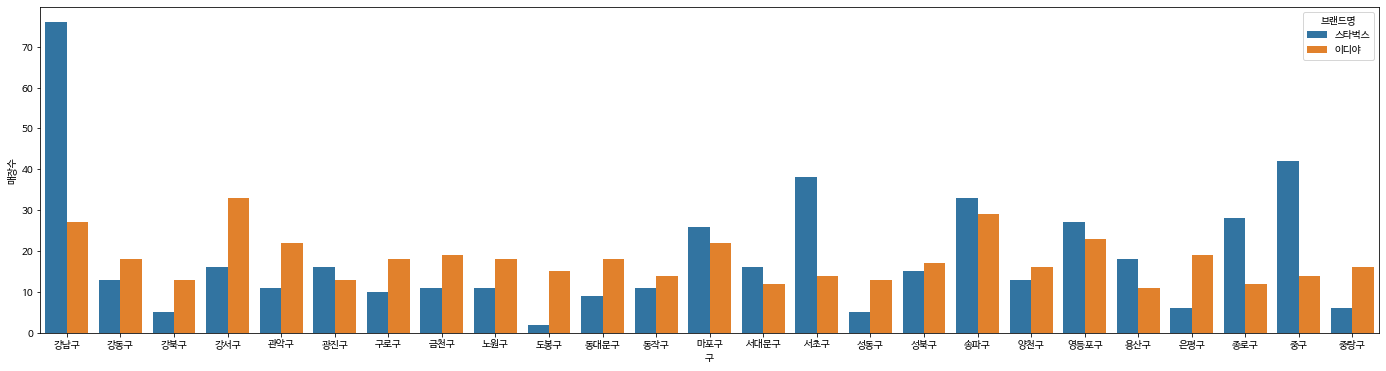

In [58]:
plt.figure(figsize=(24,6))
sns.barplot(data = df_coffee_brand, x='구', y='매장수', hue='브랜드명')